In [7]:
import numpy as np
np.random.seed(42)

In [8]:
import matplotlib.pyplot as plt
from plotting import plot_contours
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from dataset import generate_dataset

#### SVM:

$min_w \frac{1}{2} ||w||^2$  
$s.t. \ \ (<x_i, w> + b) \cdot y_i \geq 1, \forall i$  

In [9]:
x, y = generate_dataset()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

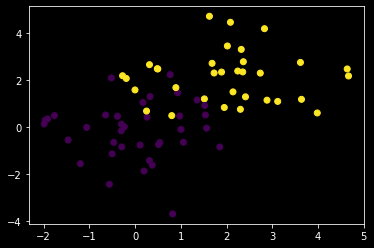

In [10]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

Score:  0.8666666666666667
Confusion matrix:
 [[12  1]
 [ 3 14]]


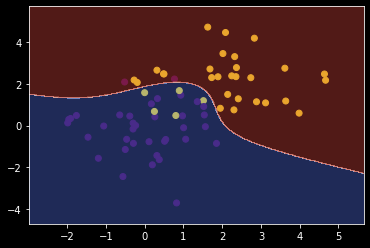

In [11]:
# Kernel: rbf, linear, poly, sigmoid
# C: low <=> smooth dec. boundary, high <=> acc. more important
# gamma: low <=> higher influence, high <=> lower influence
kernel = "poly"
C = 0.5
gamma = 1 / x.shape[1]

clf = SVC(kernel=kernel, C=C, gamma=gamma)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)

print("Score: ", score)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(1, 1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plot_contours(ax, clf, x_train[:,0], x_train[:,1], cmap=plt.cm.coolwarm, alpha=0.4)
plt.show()